/home/tanke/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


data_storage/Market-1501-v15.09.15 found :)
	load layer 001/240
	load layer 011/240
	load layer 021/240
	load layer 031/240
	load layer 041/240
	load layer 051/240
	load layer 061/240
	load layer 071/240
	load layer 081/240
	load layer 091/240
	load layer 101/240
	load layer 111/240
	load layer 121/240
	load layer 131/240
	load layer 141/240
	load layer 151/240
	load layer 161/240
	load layer 171/240
	load layer 181/240
	load layer 191/240
	load layer 201/240
	load layer 211/240
	load layer 221/240
	load layer 231/240


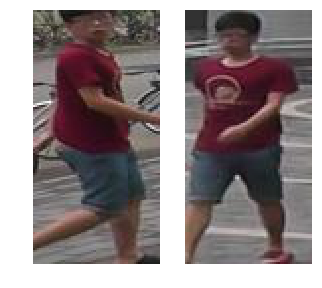

In [4]:
%matplotlib inline
from pak.datasets.Market1501 import Market1501
import matplotlib.pyplot as plt
from keras.models import load_model
import sys
sys.path.insert(0, '../')
from reid import reid

root = 'data_storage'
m1501 = Market1501(root)
X, Y = m1501.get_train()

model = reid.ReId(verbose=True)

im1 = X[0]
im2 = X[2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

score: [0.8584792]


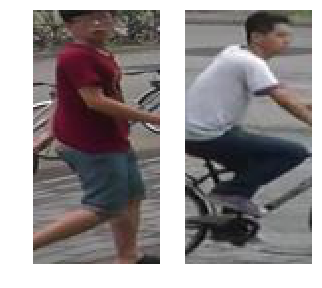

In [5]:
im1 = X[0]
im2 = X[99]

score = model.predict(im1, im2)

print('score:', score)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

score: [0.84999835 0.852985   0.8590308  0.8585146  0.8496132  0.8528523 ]


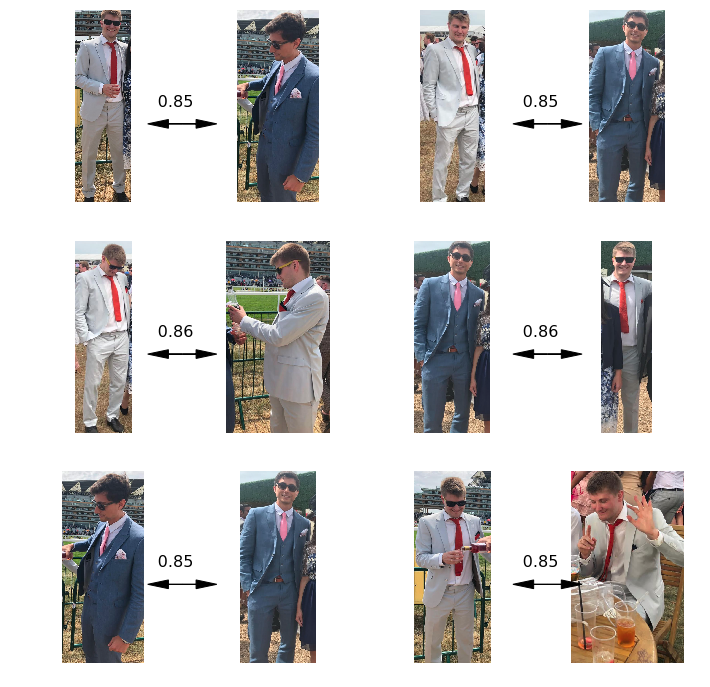

In [6]:
from math import ceil
import cv2
from os.path import isfile, join

A = ['im01', 'im02', 'im03', 'im09', 'im10', 'im04']
B = ['im10', 'im09', 'im07', 'im05', 'im09', 'im08']

A = [
    cv2.cvtColor(cv2.imread(join('img', a) + '.png'), 
                 cv2.COLOR_BGR2RGB) for a in A
]
B = [
    cv2.cvtColor(cv2.imread(join('img', b) + '.png'), 
                 cv2.COLOR_BGR2RGB) for b in B
]
assert len(A) == len(B)
n = len(A)

score = model.predict(A, B)

print('score:', score)



fig = plt.figure(figsize=(12, 12))

for i, (a, b, s) in enumerate(zip(A, B, score)):
    
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+1)
    ax.axis('off')
    ax.imshow(a)
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+2)
    ax.axis('off')
    ax.imshow(b)
    
    txt = "{:10.2f}".format(s)
    ax = fig.add_subplot(int(ceil(n/2)), 2, i+1)
    ax.axis('off')
    ax.text(0.3, 0.5, txt, fontsize=16)
    ax.plot([0, 1], [0, 1], alpha=0.0)
    ax.arrow(x=0.5, y=0.4, dx=-0.05, dy=0, head_width=0.05, color='black')
    ax.arrow(x=0.5, y=0.4, dx=0.05, dy=0, head_width=0.05, color='black')


plt.show()

In [7]:
import json
import numpy as np
from math import ceil
from reid.data import UMPMSampler

Settings = json.load(open('settings.txt'))
target_w = 221
target_h = 221

root = Settings['data_root']  # where data is stored
user = Settings['UMPM']['username']  # request this from the UMPM website
pwd = Settings['UMPM']['password']
umpm_sampler = UMPMSampler(root, ['p2_free_1'], user, pwd, target_w, target_h)

X, Y = umpm_sampler.get_train(batch_size=16)
n = len(X)

Im1 = X[:, :, :, 0:3]
Im2 = X[:, :, :, 3:6]

score = model.predict(Im1, Im2)

fig = plt.figure(figsize=(16,16))
for i, (y, y_hat, im) in enumerate(zip(Y, score, X)):
    im1 = im[:, :, 0:3].astype('uint8')
    im2 = im[:, :, 3:6].astype('uint8')
    img = np.concatenate([im1, im2], axis=1)
    ax = fig.add_subplot(int(ceil(n/3)), 3, i+1)
    ax.axis('off')
    ax.set_title(str(y[0]) + ' vs ' + str(y_hat))
    ax.imshow(img)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'settings.txt'